# Tutorial on how to use the [pyPhenoPop](https://github.uio.no/leonargs/pyPhenoPop) package for phenotypic deconvolution in heterogeneous cancer cell populations using drug screening data

For details on the method, we refer to the original [publication](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2).

The main function of the package is the `mixture_id` function which can be imported via `from mixpopid.mixpopid import mixture_id`

In [1]:
from mixpopid.mixpopid import mixture_id

`mixture_id` has 5 required and 6 optional arguments (see `help(mixture_id)` for details). The data needs to be provided as `csv` file, where the rows are the cell counts for different concentrations of the drug and the columns are timepoints and replicates. The format is structured as follows:

|  | |
|------------------------|------------------------|
| replicate1_time1_dose1 | replicate1_time1_dose2 |
| replicate2_time1_dose1 | replicate2_time1_dose2 |
| replicate1_time2_dose1 | replicate1_time2_dose2 |
| replicate2_time2_dose1 | replicate2_time2_dose2 |

Here we use simulated data from [Köhn-Luque et al.](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2), corresponding to the data used in Figure 2a, 4th row. The data can be found in the `example` folder as `DATA-2-case-1-Noise-50-mix-0.5.csv`.

In [2]:
example_file = './DATA-2-case-1-Noise-50-mix-0.5.csv'

num_replicates = 4

timepoints = [0, 12, 24, 36, 48, 60, 72, 84, 96]

concentrations = [0.00000000e+00, 5.00000000e-06, 1.07721735e-05, 2.32079442e-05,
       5.00000000e-05, 1.07721735e-04, 2.32079442e-04, 5.00000000e-04,
       1.07721735e-03, 2.32079442e-03, 5.00000000e-03, 1.07721735e-02,
       2.32079442e-02, 5.00000000e-02, 1.07721735e-01, 2.32079442e-01,
       5.00000000e-01]

max_subpopulations = 4
num_local_optimizations = 250
result = mixture_id(max_subpopulations, 
                    example_file, 
                    timepoints, 
                    concentrations, 
                    num_replicates, 
                    num_optim=num_local_optimizations)

Optimizing for 1 subpopulations


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:39<00:00,  6.36it/s]


Optimizing for 2 subpopulations


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [02:36<00:00,  1.60it/s]


Optimizing for 3 subpopulations


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [05:15<00:00,  1.26s/it]


Optimizing for 4 subpopulations


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [09:00<00:00,  2.16s/it]

Estimated number of cell populations:  2
Minimal negative log-likelihood value found:  3507.2334417154552
Mixture parameter(s):  [0.4941067865953615, 0.5058932134046386]
Model parameters for subpopulation #1:
alpha :  0.030650510654289125
b :  0.0
E :  0.0001278043371619479
n :  2.662992820097841
Model parameters for subpopulation #2:
alpha :  0.02987909279280737
b :  0.0
E :  0.012087120625540662
n :  2.9942019630906693
Sigma high: 323.2824819716835
Sigma low: 69.0305091434477


The result dictionary contains a summary of the optimization results and more detailed results for the different subpopulations. `fval` and `parameters` are the negative log-likelihood value and the parameters for all local optimizations. `final_fval` and `final_parameters` are the respective results of the overall best run.

In [3]:
print('Keys of the result dict:\n', result.keys())
print('Keys per subpopulation:\n', result['2_subpopulations'].keys())
print('Summary:\n', result['summary'])


Keys of the result dict:
 dict_keys(['1_subpopulations', '2_subpopulations', '3_subpopulations', '4_subpopulations', 'summary'])
Keys per subpopulation:
 dict_keys(['fval', 'parameters', 'BIC', 'final_fval', 'final_parameters', 'gr50'])
Summary:
 {'estimated_num_populations': 2, 'final_neg_log_likelihood': 3507.2334417154552, 'best_optimization_idx': 65, 'final_parameters': array([4.94106787e-01, 3.06505107e-02, 0.00000000e+00, 1.27804337e-04,
       2.66299282e+00, 2.98790928e-02, 0.00000000e+00, 1.20871206e-02,
       2.99420196e+00, 3.23282482e+02, 6.90305091e+01])}


After performing parameter optimization, the results can be plotted in different ways.

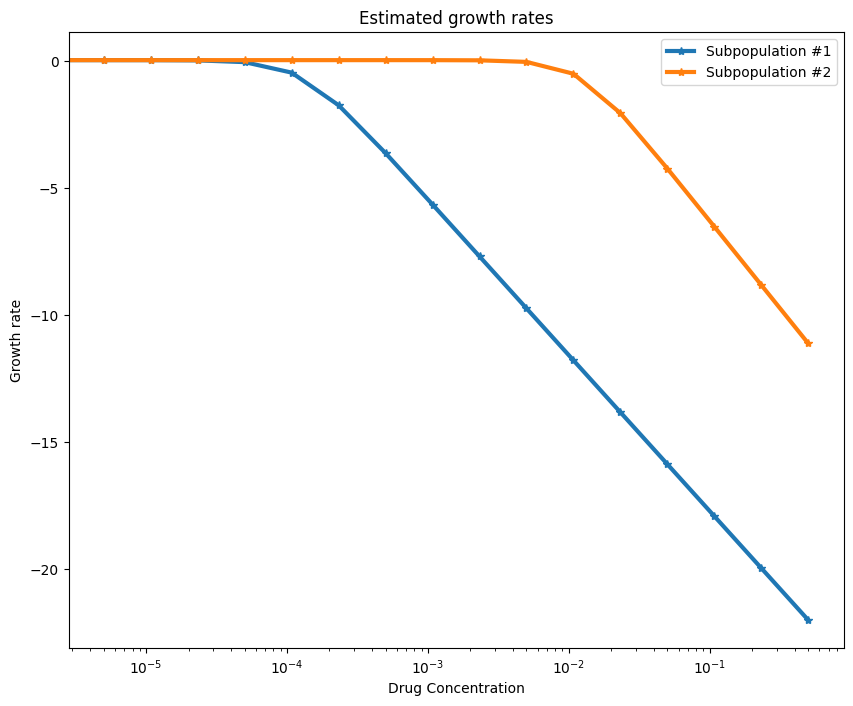

In [4]:
from mixpopid.plotting import *

plot_growth_curves(result, concentrations);

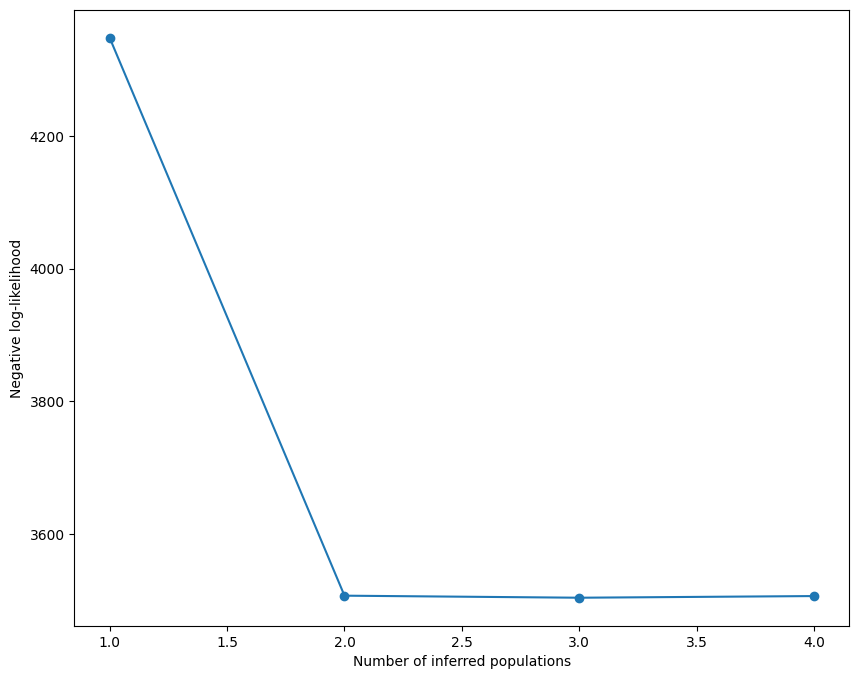

In [5]:
plot_elbow(result);

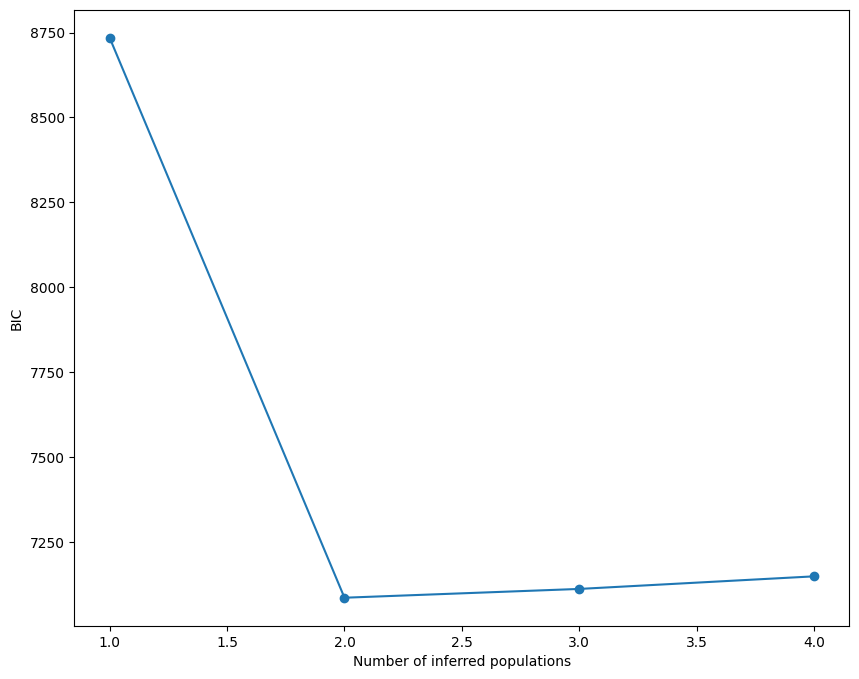

In [6]:
plot_bic(result);